# Investigating Fandango Movie Ratings

Fandango is an online movie ratings aggregator.

In October 2015, Walt Hickey from FiveThirtyEight analyzed movie ratings data and published a popular article where he presented strong evidence which suggest that Fandango's movie rating system was biased and dishonest. 

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

We shall compare the data used by Hickey in his 2015 analysis and compare it with data for movies released in 2016 and 2017.
The data used by Hickey is available here: https://github.com/fivethirtyeight/data/blob/master/fandango/fandango_score_comparison.csv

The data for 2016-2017 is available here: https://github.com/mircealex/Movie_ratings_2016_17/blob/master/movie_ratings_16_17.csv


## Exploring the Data

We shall begin by reading in the two datasets and checking the datain them

In [3]:
import pandas as pd
rat_2015 = pd.read_csv("fandango_score_comparison.csv")
rat_16_17 = pd.read_csv("movie_ratings_16_17.csv")

In [4]:
rat_2015.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
rat_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

The dataset contains ratings of movies across various websites. As we are only interested in ratings on Fandango, we shall keep only the relevant columns in our dataset.

In [6]:
rat_2015= rat_2015[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [7]:
rat_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
rat_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [9]:
rat_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


We shall repeat the process for the other dataset as well. we shall keep only the data relevant to our analysis for this dataset

In [10]:
rat_16_17 = rat_16_17[['movie', 'year', 'fandango']]

In [11]:
rat_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


After checking the readme files for both datasets, we come to the conclusion that the sampling processes were not random.

The two samples only contain movie with a significant number of reviews on Fandango. For the 2015 sample, the readme states that this means movie with 30 or more ratings. For the 2016-2017, this means the movies released in 2016-2017 with the most reviews.

They are not representative, as we are not looking at movies with few ratings. 

Having reached this understanding, we shall now change our goal to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. i.e Whether Fandango changed their rating system for popular movies in 2016

For this analysis we shall define popular as having 30 fan ratings or more on Fandango's website.

## Isolating the samples we need

Let us check our datasets again and verify that both datasets meet our popularity criteria.i.e. atleast 30 Fan reviews

We shall first verify if our 2015 dataset contains any movies which have less tahn 30 fan ratings

In [12]:
len(rat_2015[rat_2015["Fandango_votes"]<30])

0

We have verified that there are no rows, i.e. movies, which have less than 30 fan ratings

Also, as we plan to only compare movies released in 2015 and 2016, let us check if our dataset for 2015 contains movies released in any other year.

To achieve this, we shall extract the Year from the movie title and add it to another column titled year

In [13]:
rat_2015["Year"] = rat_2015["FILM"].str[-5:-1]

In [14]:
rat_2015["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

Let us remove the data for 2014 as it is redundant for our analysis

In [15]:
rat_2015 = rat_2015[rat_2015["Year"] == "2015"]

In [16]:
rat_2015["Year"].value_counts()

2015    129
Name: Year, dtype: int64

Having cleaned our 2015 dataset, let us now check our 16-17 dataset.

For our 2016-2017 dataset, we do not have any information about the fan rating number for each movie. 

Also, as of August 2021, the Fandango website has drastically changed. Their review system is now powered by Rotten Tomatoes, and their is no way to access the number of reviews a movie had in 2016-2017.

However, as per solution notebook and the projects presented by peers, we can confirm that the movies released in 2016 fulfill our criteria. Hence, we shall move forward with this dataset.

We shall now filter our dataset to keep data pertaning only to 2016.

In [17]:
rat_16_17["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [18]:
rat_16_17 = rat_16_17[rat_16_17["year"] == 2016]

In [19]:
rat_16_17["year"].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

Let's now compare the shapes of the movie rating distributions for 2015 and 2016.

In [25]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

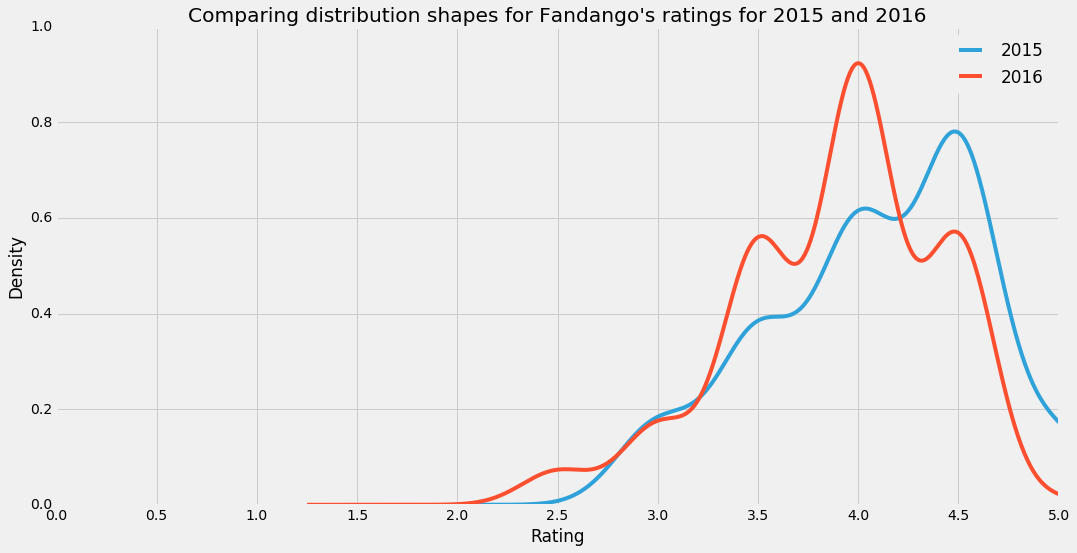

In [28]:
rat_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (16,8))
rat_16_17['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings for 2015 and 2016")

plt.xlabel("Rating")
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

From the graph above, we can see that both the graphs are left skewed, indicating that most of the movies received ratings greater than 3. The graph for 2016 is a bit less skewed than the one for 2015 and is shifted a bit more towards the left. suggesting lower ratings for movies in 2016

Also, the minimum rating in 2015 is higher compared to that in 2016.

Both these trends suggest lower ratings for movies in 2016.

## Comparing Relative Frequencies

Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead.

In [30]:
rat_2015_normalise = rat_2015["Fandango_Stars"].value_counts(normalize = True).sort_index() *100

In [31]:
rat_2015_normalise

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [32]:
rat_2016_normalise = rat_16_17["fandango"].value_counts(normalize = True).sort_index() *100

In [33]:
rat_2016_normalise

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Comparing the relative frequency tables, we can clearly observe that on an average ratings have decreased from 2015 to 2016.

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Most popular rating has reduced from 4.5 to 4 from 2015 to 2016.
The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

## Determining the Direction of Change

Let us now try and get a more precise picture about the direction of the change.

To achieve this, we shall calculate, plot and compare summary statistics (mean, median, and mode) for each distribution of movie ratings:

In [34]:
mean_2015 = rat_2015['Fandango_Stars'].mean()
mean_2016 = rat_16_17['fandango'].mean()

median_2015 = rat_2015['Fandango_Stars'].median()
median_2016 = rat_16_17['fandango'].median()

mode_2015 = rat_2015['Fandango_Stars'].mode()[0]
mode_2016 = rat_16_17['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']

In [36]:
summary = round(summary,2)

In [37]:
summary

,2015,2016
mean,4.09,3.89
median,4.00,4.00
mode,4.50,4.00


Now, let us create a plot for the two values

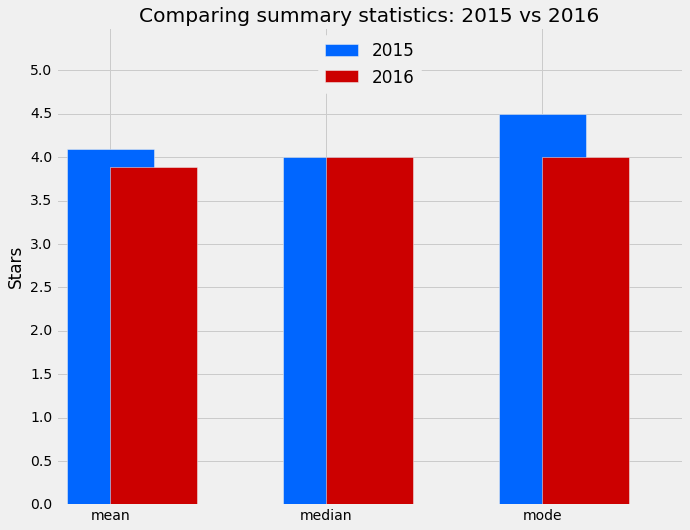

In [47]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = 0.4, )
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .4,rot = 0, figsize = (10,8))

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.legend(loc = 'upper center')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.5,0.5))
plt.ylabel("Stars")
plt.show()

From the table and the graph above we can observe that the median has dropped by 0.2 points from 2015 to 2016. This is a drop of almost 5% as compared to 2015.

The median value has remained the same for both the years while the mode has decreased by 0.5.

## Conclusion

From our analysis, we can conclude that the rating systems have changed for popular movies from 2015 to 2016.

On average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

This is indicative that after Hickey's analysis, Fandango fixed their biased rating syste